# Classification de fichiers audio
Dans ce notebook, nous allons nous familiariser avec les fichiers audio et comment nous pouvons les formater pour pouvoir les utiliser comme données d'entrée à un réseau de neurone. Ce notebook peut être trouvé sur [ce lien](https://github.com/fastaudio/fastaudio/tree/master/docs) 

In [ ]:
!git clone https://github.com/nathanhubens/MultimedIA.git

Cloning into 'MultimedIA'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 163 (delta 52), reused 78 (delta 27), pack-reused 52
Receiving objects: 100% (163/163), 110.07 MiB | 35.31 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
!ls

MultimedIA  sample_data


In [ ]:
!pip install fastai --upgrade
!pip install fastaudio

  Using cached fastai-2.5.3-py3-none-any.whl (189 kB)
  Using cached fastcore-1.3.26-py3-none-any.whl (56 kB)
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.3.20
    Uninstalling fastcore-1.3.20:
      Successfully uninstalled fastcore-1.3.20
  Attempting uninstall: fastai
    Found existing installation: fastai 2.3.1
    Uninstalling fastai-2.3.1:
      Successfully uninstalled fastai-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastaudio 1.0.2 requires fastai==2.3.1, but you have fastai 2.5.3 which is incompatible.
fastaudio 1.0.2 requires fastcore==1.3.20, but you have fastcore 1.3.26 which is incompatible.


  Using cached fastai-2.3.1-py3-none-any.whl (194 kB)
  Using cached fastcore-1.3.20-py3-none-any.whl (53 kB)
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.3.26
    Uninstalling fastcore-1.3.26:
      Successfully uninstalled fastcore-1.3.26
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.3
    Uninstalling fastai-2.5.3:
      Successfully uninstalled fastai-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastdownload 0.0.5 requires fastcore>=1.3.26, but you have fastcore 1.3.20 which is incompatible.


In [ ]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *

/usr/local/lib/python3.7/dist-packages/torchaudio/backend/utils.py:47: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  '"torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. '


## ESC-50: Dataset for Environmental Sound Classification
Cette base de données regroupent 2000 fichiers audio de 5 secondes labélisées en 50 classes et appartiennent à 5 classes majeures.

\begin{array}{ccccc}
\textbf{Animals}&\textbf{Natural soundscapes and water sound}&\textbf{Human, non-speech sounds}&\textbf{Interior/domestic sound}&\textbf{Exterior/urban noises}\\
Dog&Rain&Crying Baby&Soor knock&Helicopter\\
Rooster&Sea waves&Sneezing&Mouse click&Chainsaw\\
Pig&Crackling fire&Clapping&Keyboard typing&Siren\\
Cow&Crickets&Breathing&Door, wood creaks&Car horn
\end{array}

Pour plus d'information sur ce dataset [ici](https://github.com/karolpiczak/ESC-50).

In [ ]:
#The first time this will download a dataset that is ~650mb
path = untar_data(URLs.ESC50, dest="ESC50")

In [ ]:
print("Chemin du dossier de la base de données : ", path)
(path/"audio").ls()

Chemin du dossier de la base de données :  ESC50/master


(#2000) [Path('ESC50/master/audio/3-51909-B-42.wav'),Path('ESC50/master/audio/2-72547-A-14.wav'),Path('ESC50/master/audio/3-131943-A-37.wav'),Path('ESC50/master/audio/3-102583-C-49.wav'),Path('ESC50/master/audio/2-51630-A-49.wav'),Path('ESC50/master/audio/2-127108-A-38.wav'),Path('ESC50/master/audio/3-115387-A-47.wav'),Path('ESC50/master/audio/1-17742-A-12.wav'),Path('ESC50/master/audio/3-151557-B-28.wav'),Path('ESC50/master/audio/1-71030-A-6.wav')...]

In [ ]:
(path/"meta").ls()

(#2) [Path('ESC50/master/meta/esc50.csv'),Path('ESC50/master/meta/esc50-human.xlsx')]

In [ ]:
df = pd.read_csv(path/"meta"/"esc50.csv")
df.head(10)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


Lire et visualiser un fichier audio de la base de données 

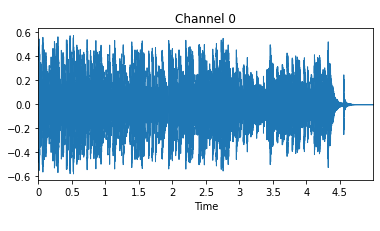

In [ ]:
audio_files = get_audio_files(path)
example = audio_files[10]
audio = AudioTensor.create(example)
audio.show()

Conversion de l'audio en spectrogramme

/usr/local/lib/python3.7/dist-packages/torchaudio/functional/functional.py:358: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  "At least one mel filterbank has all zero values. "


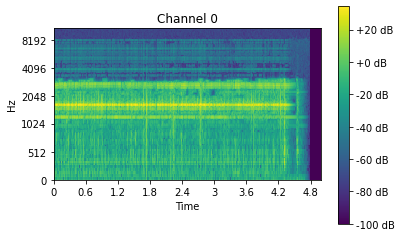

In [ ]:
cfg = AudioConfig.BasicMelSpectrogram(n_fft=512)
a2s = AudioToSpec.from_cfg(cfg)

spectrogram = a2s(audio)
spectrogram.show()

Création de la fonction de répartition des données

In [ ]:
import sys
sys.path.append('MultimedIA/Lesson 2/audio/')
import split
audio_tfms = Pipeline([a2s, MaskFreq(num_masks=3, size=5), MaskTime()])
auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_x = ColReader("filename", pref=path/"audio"), 
                 splitter = split.CrossValidationSplitter(fold=1),
                 batch_tfms = [a2s],
                 get_y = ColReader("category"))

dbunch = auds.dataloaders(df, bs=64)

TypeError: ignored

(AudioSpectrogram([[[[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [ -12.8485,    6.2579,    7.4763,  ...,    8.1944,   -5.8800,
               9.5174],
           [ -17.9988,    1.1076,    2.3260,  ...,    3.0441,  -11.0303,
               4.3671],
           ...,
           [ -26.1688,  -21.2095,  -20.8748,  ...,  -24.5626,  -12.4995,
             -19.7606],
           [ -23.4826,  -20.7844,  -22.4710,  ...,  -24.5875,  -19.6156,
             -18.1536],
           [ -22.7663,  -26.7628,  -22.9860,  ...,  -23.0049,  -24.0136,
             -22.1974]]],
 
 
         [[[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
            -100.0000],
           [ -25.6541,  -30.2095,  -20.4349,  ...,  -22.6924,  -20.8164,
             -14.4949],
           [ -30.8044,  -35.3597,  -25.5852,  ...,  -27.8427,  -25.9667,
             -19.6452],
           ...,
           [ -24.9838,  -28.1791,  -29.1166,  ...,  -29.7602,  -29.2593,
      

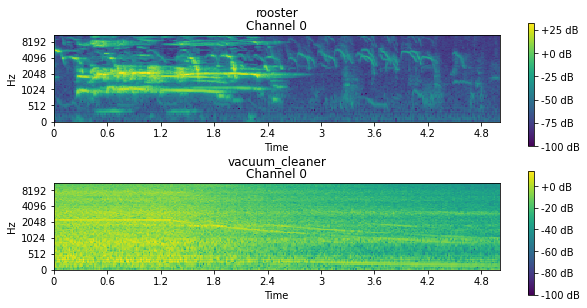

Création du module d'entrainement d'un réseau de neurone

In [ ]:
learn = cnn_learner(dbunch,
                    resnet34,
                    n_in=1, 
                    loss_func = CrossEntropyLossFlat(),
                    metrics=[accuracy]
                    )

#cbs=[MixUp()]

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
def run_learner():
  learn.fine_tune(10)
run_learner()

epoch,train_loss,valid_loss,accuracy,time
0,4.715548,2.446527,0.355000,00:24


epoch,train_loss,valid_loss,accuracy,time
0,2.358587,1.940318,0.472500,00:25
1,1.716653,1.478059,0.575000,00:24
2,1.181047,1.226184,0.662500,00:25
3,0.806004,1.226836,0.665000,00:25
4,0.534971,1.101916,0.682500,00:26
5,0.361402,1.090711,0.695000,00:26
6,0.242136,1.058395,0.715000,00:25
7,0.164410,1.043974,0.705000,00:25
8,0.114461,1.041922,0.710000,00:25
9,0.086411,1.029498,0.710000,00:24


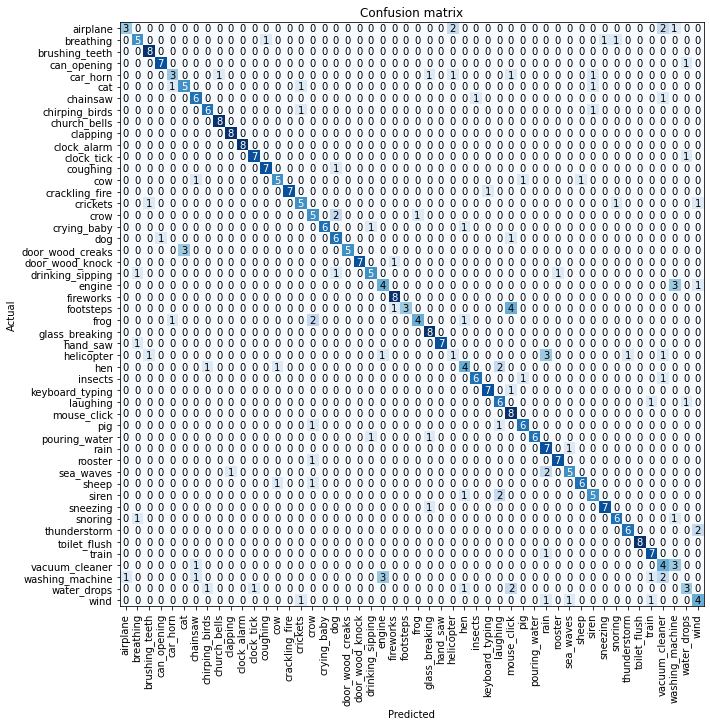

In [ ]:
from IPython.core.pylabtools import figsize
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))